# LEBRON VS JORDAN PREDICTION



## ANALISIS DE LOS DATOS


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, recall_score, precision_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
    
# import some data to play with
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

jordan_dataset = load_dataset('data/jordan_career.csv')
lebron_dataset = load_dataset('data/lebron_career.csv')


# Take the first two features. We could avoid this by using a two-dim dataset
#data = dataset.values


In [151]:
def check_dataframe(dataframe):
    print('############### DTYPES ###############')
    print(dataframe.dtypes)
    print('############### HEAD ###############')
    print(dataframe.head(5))
    print('############### NaN ###############')
    print(dataframe.isnull().sum())
    print('############### TAIL ###############')
    print(dataframe.tail(5))
    print('############### INFO ###############')
    print(dataframe.info())

In [152]:
check_dataframe(jordan_dataset)

############### DTYPES ###############
game            int64
date           object
age            object
team           object
opp            object
result         object
mp             object
fg              int64
fga             int64
fgp           float64
three           int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
minus_plus    float64
dtype: object
############### HEAD ###############
   game        date     age team  opp   result     mp  fg  fga    fgp  ...  \
0     1  1984-10-26  21-252  CHI  WSB  W (+16)  40:00   5   16  0.313  ...   
1     2  1984-10-27  21-253  CHI  MIL   L (-2)  34:00   8   13  0.615  ...   
2     3  1984-10-29  21-255  CHI  MIL   W (+6)  34:00  13   24  0.542  ...   
3     4  1984-10-30  21-25

In [153]:
#REMOVE COLUMN MINUS PLUS AND REPLACE ALL NAN FOR FLOAT OF 0.0
jordan_dataset = jordan_dataset.drop(['minus_plus'], axis=1)
jordan_dataset = jordan_dataset.drop(['date'], axis=1)
jordan_dataset['threep'].fillna(0.0, inplace=True)
jordan_dataset['ftp'].fillna(0.0, inplace=True)


In [154]:
jordan_dataset['result'] = jordan_dataset['result'].str[:1]
jordan_dataset["mp"] = jordan_dataset["mp"].apply(lambda x: float(str(x).replace(":",".").split(",")[0].strip()))
jordan_dataset["age"] = jordan_dataset["age"].apply(lambda x: float(str(x).replace("-",".").split(",")[0].strip()))

In [155]:
jordan_dataset.head()

,game,age,team,opp,result,mp,fg,fga,fgp,three,...,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score
0,1,21.252,CHI,WSB,W,40.0,5,16,0.313,0,...,0.857,1,5,6,7,2,4,5,16,12.5
1,2,21.253,CHI,MIL,L,34.0,8,13,0.615,0,...,1.000,3,2,5,5,2,1,3,21,19.4
2,3,21.255,CHI,MIL,W,34.0,13,24,0.542,0,...,0.846,2,2,4,5,6,2,3,37,32.9
3,4,21.256,CHI,KCK,W,36.0,8,21,0.381,0,...,1.000,2,2,4,5,3,1,6,25,14.7
4,5,21.258,CHI,DEN,L,33.0,7,15,0.467,0,...,0.750,3,2,5,5,1,1,2,17,13.2


<AxesSubplot: xlabel='pts', ylabel='Density'>

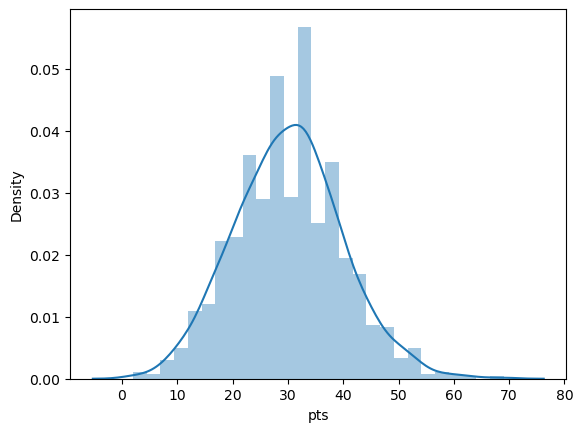

In [157]:
sns.distplot(jordan_dataset['pts'])

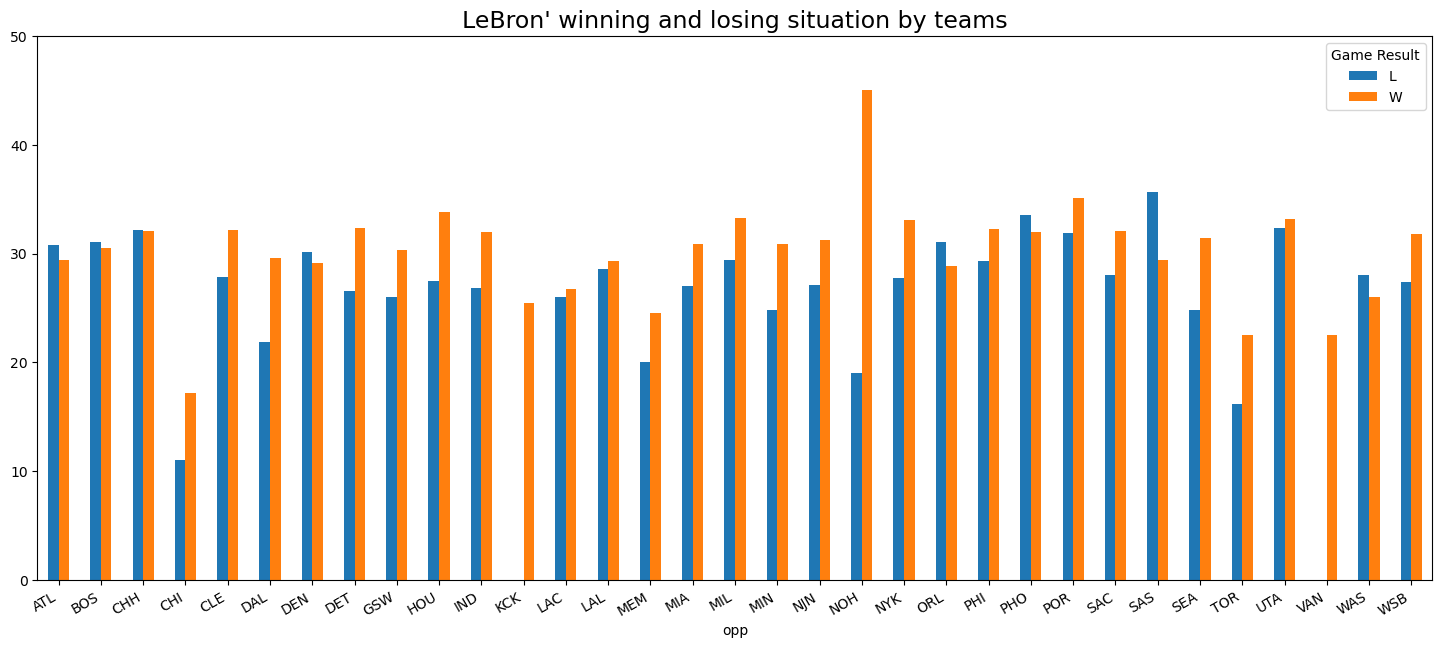

In [159]:
def plotPointsDependsOpp(dataframe):
    fig, ax = plt.subplots(figsize=(18,8))

    opp = dataframe.pivot_table(columns='result',index='opp', values='pts')
    opp.plot(ax=ax, kind='bar')

    ax.set_ylim(0, 50)
    ax.set_title("LeBron' winning and losing situation by teams", fontsize=17)
    ax.legend(loc='upper right', title='Game Result')

    fig.autofmt_xdate()

plotPointsDependsOpp(jordan_dataset)

### categorizar valores


In [160]:
print("####### JORDAN TEAMS ############")
print(jordan_dataset['team'].unique())
print("####### LEBRON TEAMS ############")
print(lebron_dataset['team'].unique())

####### JORDAN TEAMS ############
['CHI' 'WAS']
####### LEBRON TEAMS ############
['CLE' 'MIA']


In [161]:
mappingResult = {'W': 1, 'L': 0}
jordan_dataset = jordan_dataset.replace({'result': mappingResult})


In [162]:
jordan_dataset = jordan_dataset.drop(['team'], axis=1)
jordan_dataset = jordan_dataset.drop(['opp'], axis=1)

In [163]:
jordan_dataset.head()

,game,age,result,mp,fg,fga,fgp,three,threeatt,threep,...,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score
0,1,21.252,1,40.0,5,16,0.313,0,0,0.0,...,0.857,1,5,6,7,2,4,5,16,12.5
1,2,21.253,0,34.0,8,13,0.615,0,0,0.0,...,1.000,3,2,5,5,2,1,3,21,19.4
2,3,21.255,1,34.0,13,24,0.542,0,0,0.0,...,0.846,2,2,4,5,6,2,3,37,32.9
3,4,21.256,1,36.0,8,21,0.381,0,0,0.0,...,1.000,2,2,4,5,3,1,6,25,14.7
4,5,21.258,0,33.0,7,15,0.467,0,0,0.0,...,0.750,3,2,5,5,1,1,2,17,13.2


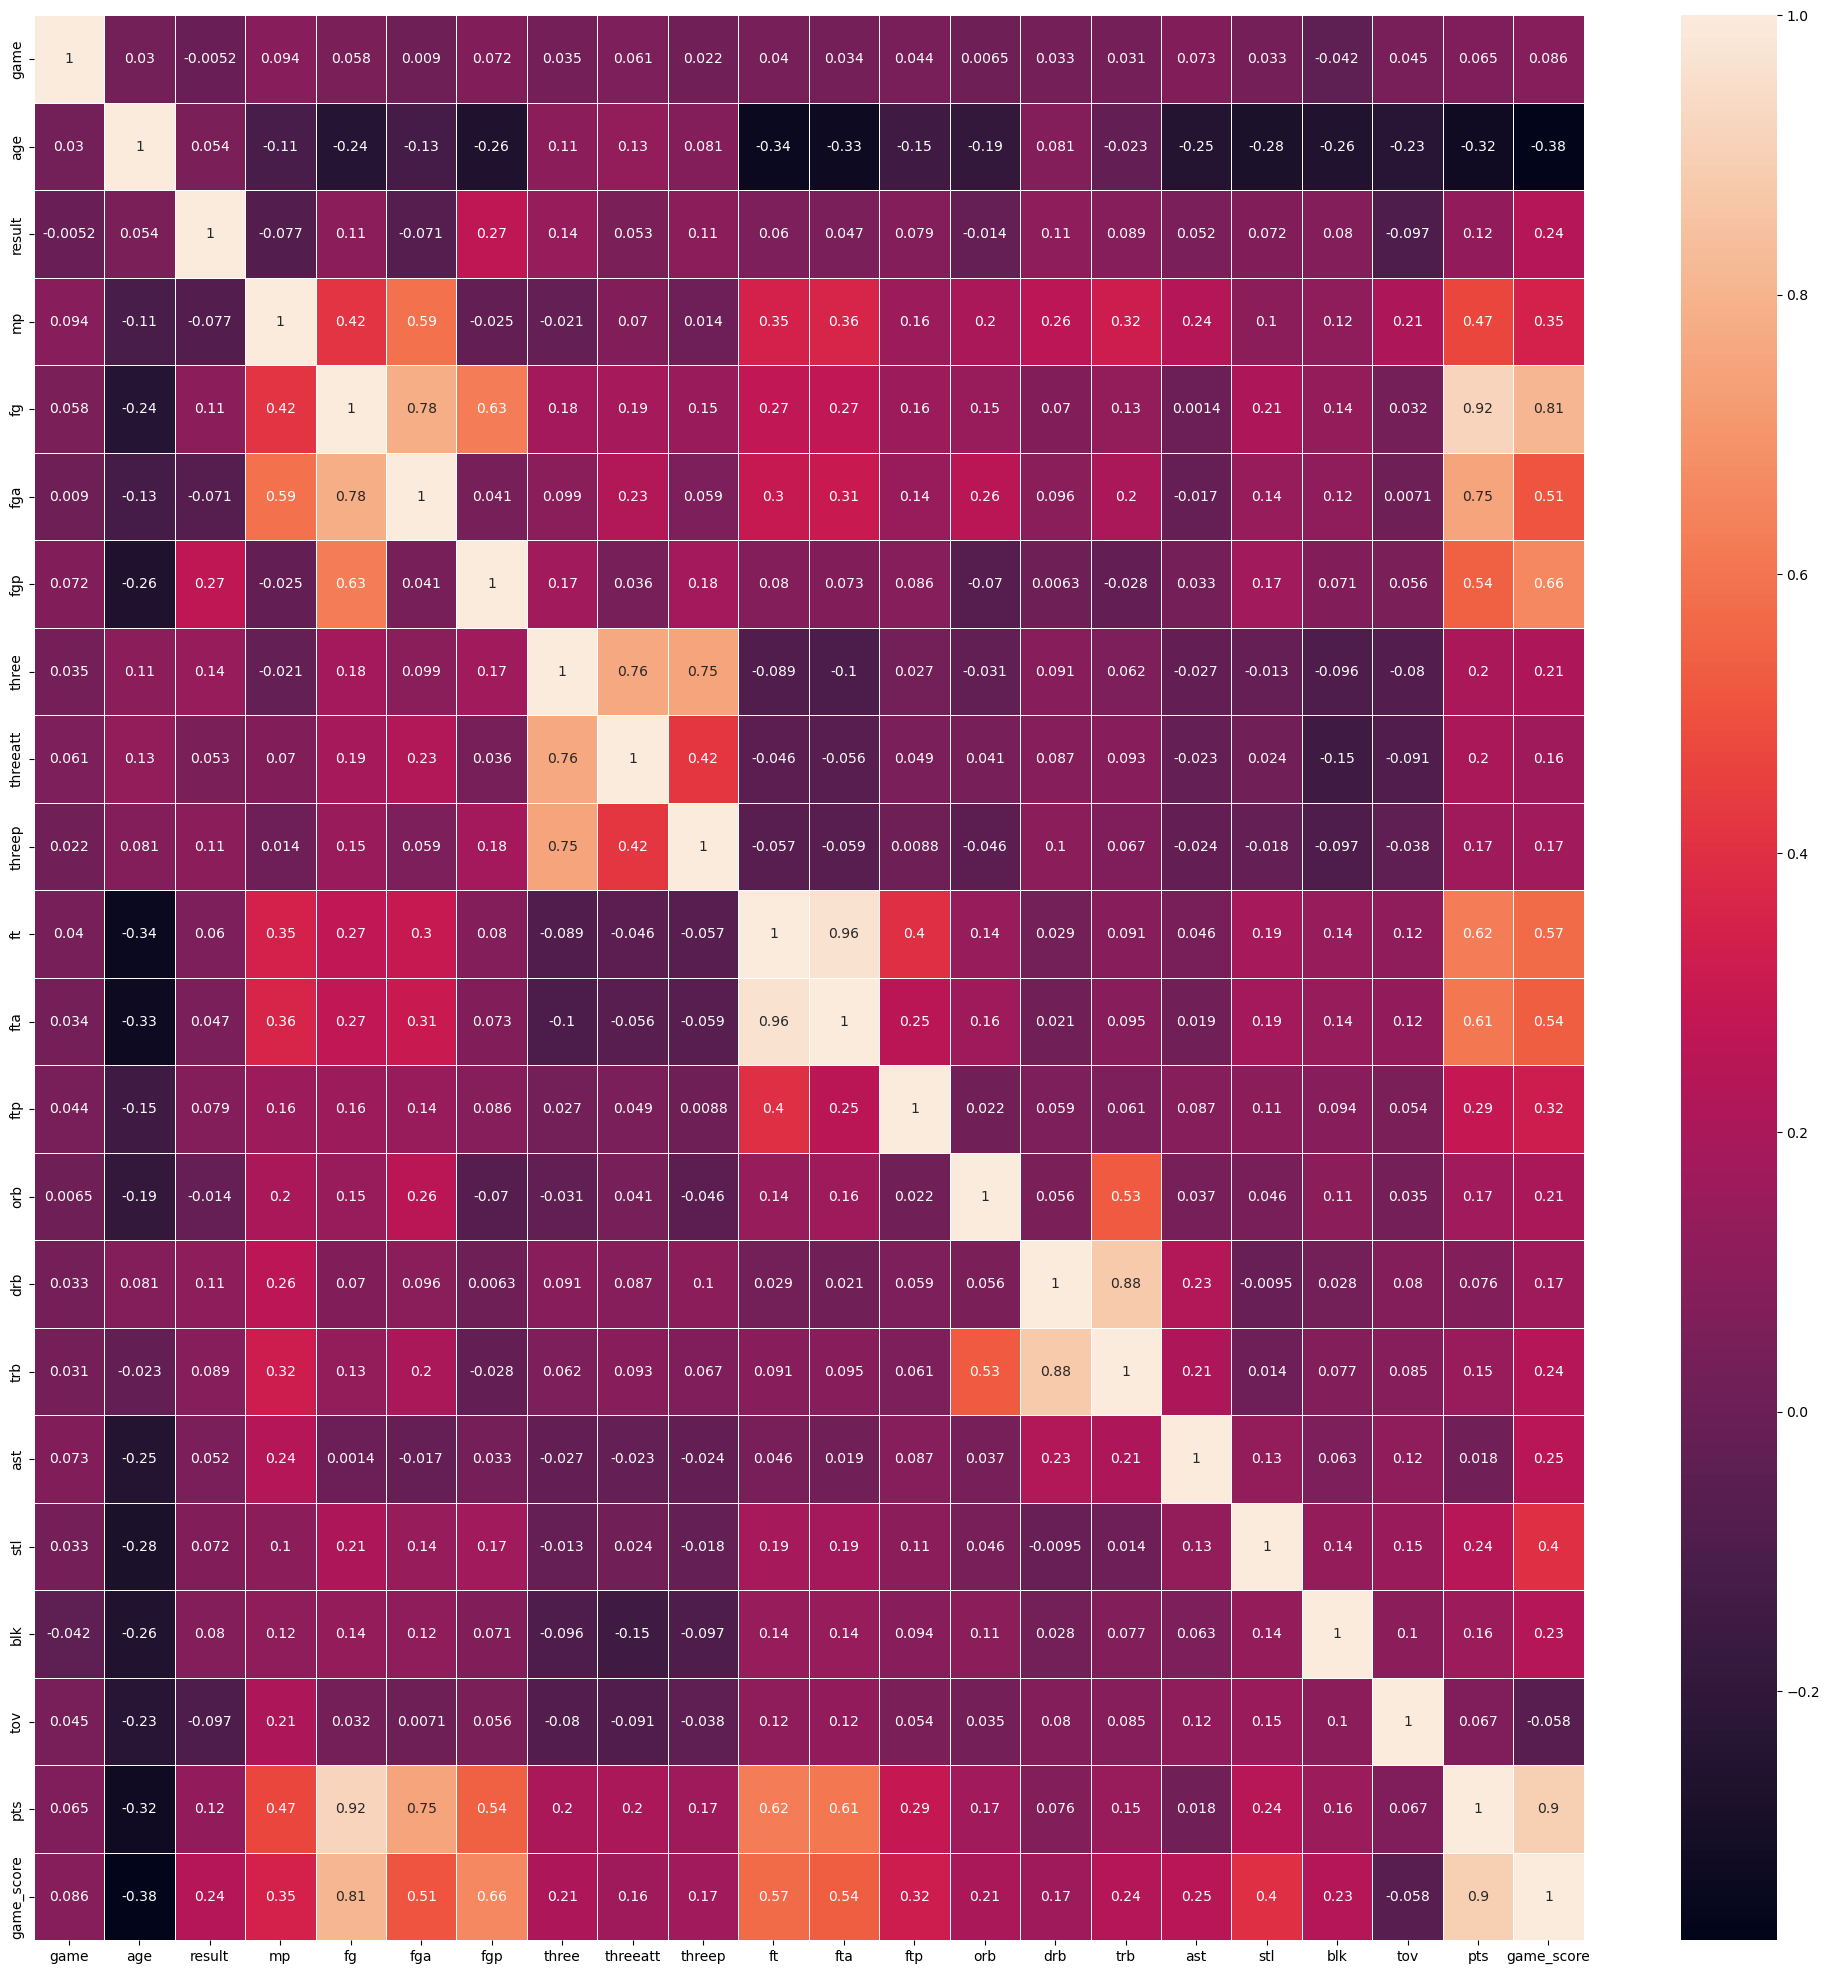

In [164]:
correlacio = jordan_dataset.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


In [185]:
data_jordan = jordan_dataset.values
data_lebron = lebron_dataset.values

In [186]:
data_jordan

array([[ 1.   , 21.252,  1.   , ...,  5.   , 16.   , 12.5  ],
       [ 2.   , 21.253,  0.   , ...,  3.   , 21.   , 19.4  ],
       [ 3.   , 21.255,  1.   , ...,  3.   , 37.   , 32.9  ],
       ...,
       [80.   , 40.054,  0.   , ...,  2.   , 17.   , 14.5  ],
       [81.   , 40.056,  0.   , ...,  2.   , 21.   , 11.3  ],
       [82.   , 40.058,  0.   , ...,  2.   , 15.   ,  8.5  ]])

In [225]:
X_jordan = data_jordan[:, [6,21]] #FG, FT, GAME_SCORE
y_jordan = data_jordan[:, 2] #PTS

X_jordan.shape

(1072, 2)

In [226]:
import time

def evaluateModel(name, model, X_train, X_test, y_train, y_test):
    initialTime = time.time()
    model.fit(X_train, y_train)
    finalTime = time.time()- initialTime
    y_pred = model.predict(X_test)
    lr_probs  = model.predict_proba(X_test)
    print("MODEL ", name )
    print('Score: ', model.score(X_test, y_test))
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred, average='macro'))
    print("Precision: ", precision_score(y_test, y_pred, average='macro'))
    print('F1_score:', f1_score(y_test, y_pred, average='macro'))
    print("Time:", finalTime )


#### NOT STANDARIZE AND PREDICTION 


In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_jordan, y_jordan, train_size=0.8, random_state=40)


In [228]:
logisticRegression = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001)
evaluateModel('Logistic Regression', logisticRegression, X_train, X_test, y_train, y_test) 

MODEL  Logistic Regression
Score:  0.6465116279069767
Accuracy:  0.6465116279069767
Recall:  0.5327030677213969
Precision:  0.5628476084538376
F1_score: 0.5115973218555715
Time: 0.006105899810791016


In [229]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc_kernel = SVC(C=1.0, kernel=kernel, gamma=0.9, probability=True, max_iter = 100000)
    evaluateModel('SVC ' + kernel, svc_kernel, X_train, X_test, y_train, y_test)
    print("\n")

MODEL  SVC linear
Score:  0.6604651162790698
Accuracy:  0.6604651162790698
Recall:  0.5
Precision:  0.3302325581395349
F1_score: 0.3977591036414566
Time: 0.299924373626709


MODEL  SVC poly
Score:  0.5395348837209303
Accuracy:  0.5395348837209303
Recall:  0.5948292494694192
Precision:  0.5925089403350273
F1_score: 0.5393754463416218
Time: 1.0288527011871338


MODEL  SVC rbf
Score:  0.6232558139534884
Accuracy:  0.6232558139534884
Recall:  0.5051128689947906
Precision:  0.510122230710466
F1_score: 0.47590959703873115
Time: 0.09199285507202148


MODEL  SVC sigmoid
Score:  0.6651162790697674
Accuracy:  0.6651162790697674
Recall:  0.5068493150684932
Precision:  0.8317757009345794
F1_score: 0.4123899180078955
Time: 0.04194474220275879




In [230]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    evaluateModel('KNN ' + str(k), knn, X_train, X_test, y_train, y_test)
    print("\n")


MODEL  KNN 1
Score:  0.5581395348837209
Accuracy:  0.5581395348837209
Recall:  0.532365425429288
Precision:  0.5300196850393701
F1_score: 0.5283890184488212
Time: 0.001631021499633789


MODEL  KNN 2
Score:  0.49767441860465117
Accuracy:  0.49767441860465117
Recall:  0.5232008489291916
Precision:  0.5212530929657123
F1_score: 0.49372056514913665
Time: 0.00041604042053222656


MODEL  KNN 3
Score:  0.586046511627907
Accuracy:  0.586046511627907
Recall:  0.5401794327609493
Precision:  0.5399175771516197
F1_score: 0.5400350953102089
Time: 0.0003879070281982422


MODEL  KNN 4
Score:  0.5348837209302325
Accuracy:  0.5348837209302325
Recall:  0.53140073316612
Precision:  0.5282160194174758
F1_score: 0.5190586972083036
Time: 0.0004322528839111328


MODEL  KNN 5
Score:  0.6139534883720931
Accuracy:  0.6139534883720931
Recall:  0.5513216284005402
Precision:  0.5560826481130087
F1_score: 0.5519146264908976
Time: 0.0003807544708251953


MODEL  KNN 6
Score:  0.5534883720930233
Accuracy:  0.553488372

In [231]:
rfc = RandomForestClassifier(n_estimators=100, max_depth= 9)
evaluateModel('Random Forest Classifier', rfc, X_train, X_test, y_train, y_test)

MODEL  Random Forest Classifier
Score:  0.6139534883720931
Accuracy:  0.6139534883720931
Recall:  0.524696121937102
Precision:  0.5329302804219193
F1_score: 0.5178199897322273
Time: 0.1278073787689209


#### STANDARIZE AND PREDICTION MODELS


In [232]:
def standarize(X):
    return StandardScaler().fit(X).transform(X)

X_jordan_standarize = standarize(X_jordan)

X_jordan_standarize

array([[-1.68089838, -1.15378093],
       [ 1.09697973, -0.42613961],
       [ 0.42550588,  0.99750646],
       ...,
       [ 0.03917846, -0.9428704 ],
       [-0.79786428, -1.28032725],
       [-0.88064873, -1.57560199]])

In [233]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_jordan)
print(pca.score(X_jordan))

-2.582226585202841


In [234]:
x_t, x_v, y_t, y_v = train_test_split(X_jordan_standarize, y_jordan, train_size=0.80, random_state=40)

In [235]:
logisticRegression = LogisticRegression(C=1.0, fit_intercept=True, penalty='l2', tol=0.0001)
evaluateModel('Logistic Regression', logisticRegression, x_t, x_v, y_t, y_v) 

MODEL  Logistic Regression
Score:  0.6604651162790698
Accuracy:  0.6604651162790698
Recall:  0.5599073895427358
Precision:  0.5963687150837989
F1_score: 0.5514304495698648
Time: 0.0035076141357421875


In [236]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svc_kernel = SVC(C=1.0, kernel=kernel, gamma=0.9, probability=True, max_iter = 100000)
    evaluateModel('SVC ' + kernel, svc_kernel, x_t, x_v, y_t, y_v)
    print("\n")

MODEL  SVC linear
Score:  0.6604651162790698
Accuracy:  0.6604651162790698
Recall:  0.5
Precision:  0.3302325581395349
F1_score: 0.3977591036414566
Time: 0.05044817924499512


MODEL  SVC poly
Score:  0.6465116279069767
Accuracy:  0.6465116279069767
Recall:  0.4960929963341694
Precision:  0.4721840659340659
F1_score: 0.4164285714285715
Time: 0.19392919540405273


MODEL  SVC rbf
Score:  0.641860465116279
Accuracy:  0.641860465116279
Recall:  0.5158691877291144
Precision:  0.5387423457371644
F1_score: 0.4798114689709348
Time: 0.08579087257385254


MODEL  SVC sigmoid
Score:  0.5674418604651162
Accuracy:  0.5674418604651162
Recall:  0.5161103607949065
Precision:  0.5162198912198912
F1_score: 0.5161524500907442
Time: 0.07386279106140137




In [237]:
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    evaluateModel('KNN ' + str(k), knn, x_t, x_v, y_t, y_v)
    print("\n")

MODEL  KNN 1
Score:  0.6046511627906976
Accuracy:  0.6046511627906976
Recall:  0.5642485047269921
Precision:  0.5630443014009845
F1_score: 0.5635195490697174
Time: 0.0020923614501953125


MODEL  KNN 2
Score:  0.5348837209302325
Accuracy:  0.5348837209302325
Recall:  0.5680108045533475
Precision:  0.5626666666666666
F1_score: 0.5319575060954371
Time: 0.00043892860412597656


MODEL  KNN 3
Score:  0.6046511627906976
Accuracy:  0.6046511627906976
Recall:  0.5542639398032028
Precision:  0.5554187192118226
F1_score: 0.554713579103823
Time: 0.0003979206085205078


MODEL  KNN 4
Score:  0.5953488372093023
Accuracy:  0.5953488372093023
Recall:  0.5771753810534439
Precision:  0.5711111111111111
F1_score: 0.5702074860412215
Time: 0.0004260540008544922


MODEL  KNN 5
Score:  0.627906976744186
Accuracy:  0.627906976744186
Recall:  0.5585568203743005
Precision:  0.5673995114368199
F1_score: 0.558974358974359
Time: 0.00042510032653808594


MODEL  KNN 6
Score:  0.641860465116279
Accuracy:  0.6418604651

In [180]:
rfc = RandomForestClassifier(n_estimators=100, max_depth= 9)
evaluateModel('Random Forest Classifier', rfc, x_t, x_v, y_t, y_v)

MODEL  Random Forest Classifier
Score:  0.6
Accuracy:  0.6
Recall:  0.5108045533474821
Precision:  0.5141843971631206
F1_score: 0.5029569892473118
Time: 0.11017966270446777
